In [1]:
import pandas as pd

tabla = pd.read_csv('data/datos_coches.csv', index_col='id')
tabla[['marca', 'modelo', 'precioE', 'precioG']]

marca  modelo  precioE  precioG
id                                     
1       VOLVO    XC40    42934    32652
2     HYUNDAI    KONA    35650    19340
3        OPEL   MOKKA    34900    22050
4     HYUNDAI   IONIQ    34210    23810
5        SEAT     MII    34200    21600
6         KIA    NIRO    32525    24000
7     PEUGEOT     208    29950    14650
8        OPEL   CORSA    29700    16000
9        FIAT     500    23900    12800
10      SKODA  CITIGO    19850     8690
11  VOLSWAGEN     UP!    19775     9970

In [155]:
# Recopilar datos

import random
from itertools import accumulate
from datetime import date
from dateutil.relativedelta import relativedelta

def get_lista_fechas(meses):
    lista = [date.today() + relativedelta(months=x) for x in range (0, meses)]
    return lista

def get_precio_energia(electrico):
    return random.randint(50, 100)/1000 if electrico else random.randint(12, 14)/10

def get_consumo_mensual(kms_estimados_anuales, tasa_consumo, electrico = True):
    costo = (kms_estimados_anuales/12) * (tasa_consumo/100) * get_precio_energia(electrico)
    return costo

def get_costos_acumulados(kms_estimados_anuales):
    costos_acum_combustion = [get_consumo_mensual(kms_estimados_anuales, consumo_combustible, electrico = False) for x in range(1,121)]
    costos_acum_electrico_sin_subv = [get_consumo_mensual(kms_estimados_anuales, consumo_electrico) for x in range(1,121)]
    costos_acum_electrico_con_subv = [get_consumo_mensual(kms_estimados_anuales, consumo_electrico) for x in range(1,121)]
    return [x + precioG for x in accumulate(costos_acum_combustion)], \
           [x + precioE for x in accumulate(costos_acum_electrico_sin_subv)], \
           [x + precioE - subvencion for x in accumulate(costos_acum_electrico_con_subv)]
# Seleccionar modelo 

# subvencion = 000
modelo = 'Fiat 500'
# kms_estimados_anuales = 20000
# consumo_combustible = 4.8
# consumo_electrico = 15.3
# precioE = 20000
# precioG = 12000

# Procesar datos

# consumo_mensual = [get_consumo_mensual(kms_estimados_anuales, consumo_electrico) for x in range(1,120) ]

# consumo_me = [x + 100000 for x in accumulate(consumo_mensual)]

# Dibujar gráficas

eje_x = get_lista_fechas(120)
eje_y1, eje_y2, eje_y3 = get_costos_acumulados(kms_estimados_anuales)

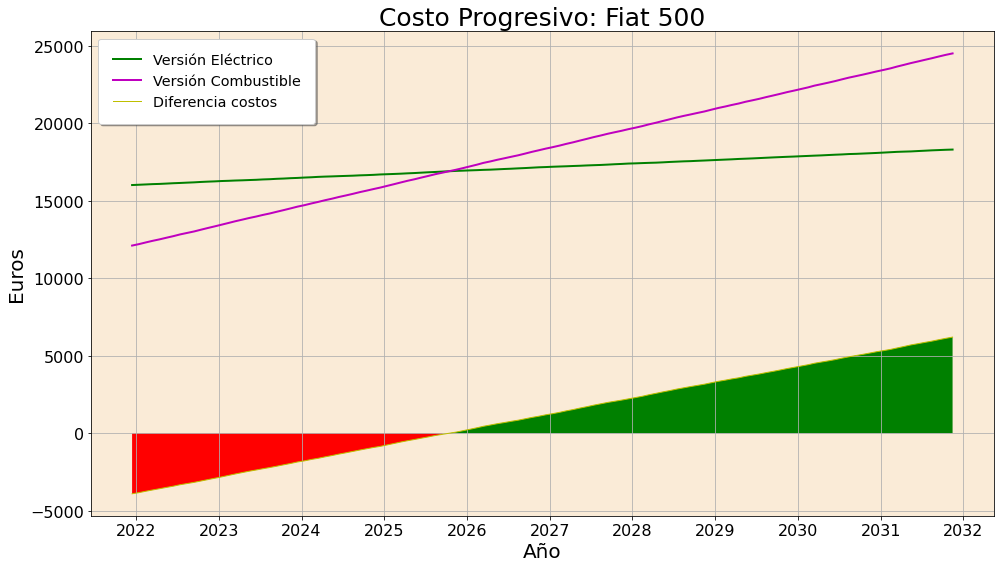

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Creación objeto Figura y Axes
fig, ax = plt.subplots(figsize=(14,8))

# Armar gráfica 1
# eje_x = [i for i in range(1,12)]

# eje_y1 = eje_y
# eje_y2 = data_comb.Gasóleo

# Diseño gráfica 1
ax.plot(eje_x, 
         eje_y3, 
         'g-', 
         lw=2, 
         label = 'Versión Eléctrico')

ax.plot(eje_x, 
         eje_y1, 
         'm-', 
         lw=2, 
         label = 'Versión Combustible')

eje_y = np.array(eje_y1) - np.array(eje_y3)

ax.plot(eje_x, 
         eje_y, 
         'y-', 
         lw=1, 
         label = 'Diferencia costos')

ax.set_title('Costo Progresivo: Fiat 500' , size=25)

ax.set_ylabel('Euros', size = 20)
ax.set_xlabel('Año', size = 20)



ax.fill_between(eje_x, 0, eje_y, where=eje_y >= 0, facecolor='green')
ax.fill_between(eje_x, 0, eje_y, where=eje_y < 0, facecolor='red')

# ax.set_ylim(9000, 25000)
ax.grid(True)

ax.tick_params(labelsize=16) # Tamaño de los ticks

ax.set_facecolor('#FAEBD7')

fig.legend(loc='upper left', 
           fontsize = 'x-large', 
           facecolor = 'white', 
           fancybox=True, 
           framealpha=1, 
           shadow=True, 
           borderpad=1, 
           bbox_to_anchor=(0,1), 
           bbox_transform=ax.transAxes)

fig.tight_layout()  

plt.show()

# Horizontally stacked subplots

Text(0.26, 0.34, 'Cruce: 3 Años, 11 Meses')

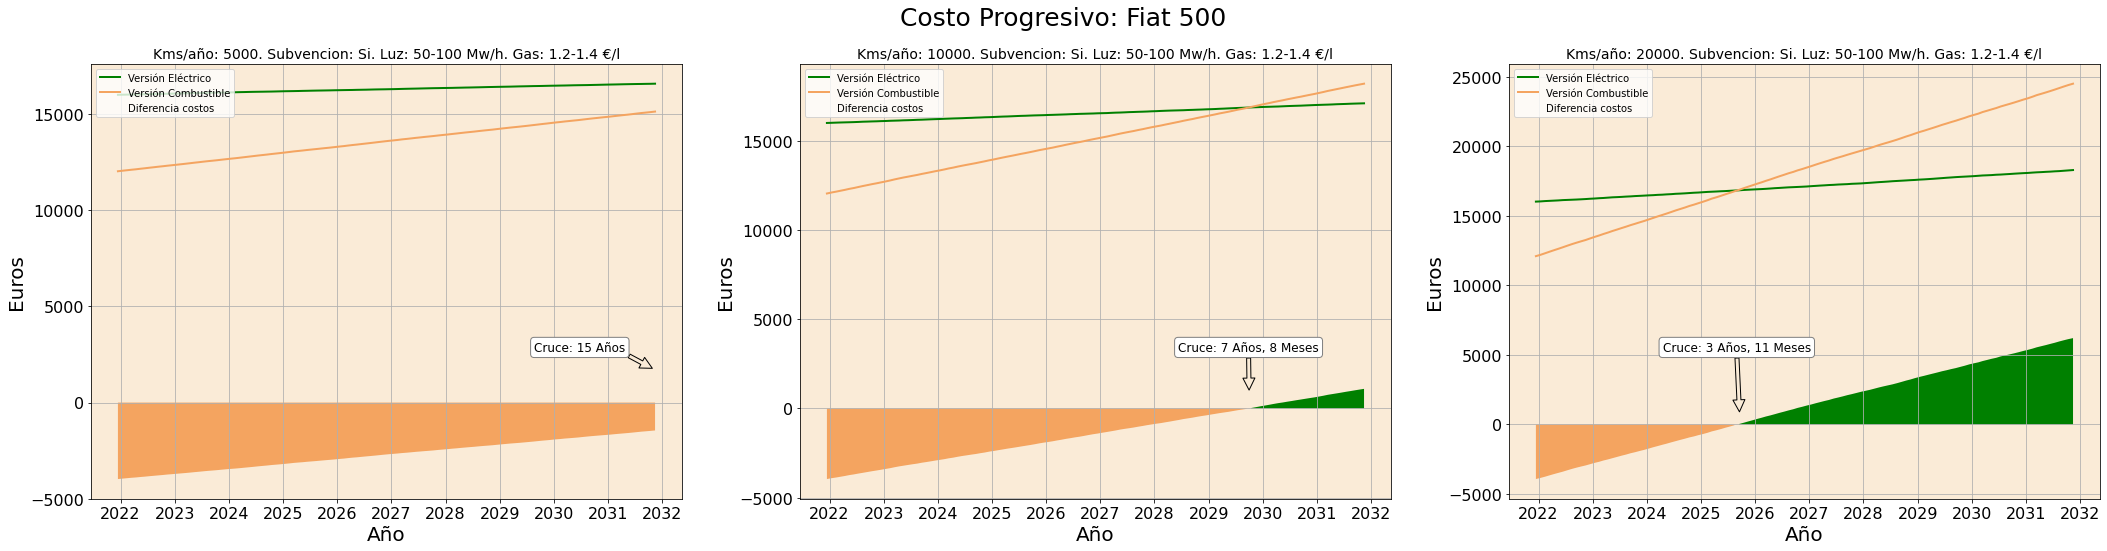

In [185]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(36, 8))
fig.suptitle('Costo Progresivo: Fiat 500' , size=25)

subvencion = 4000
modelo = 'Fiat 500'
kms_estimados_anuales = 5000
consumo_combustible = 4.8
consumo_electrico = 15.3
precioE = 20000
precioG = 12000

# Gráfica 1

eje_x = get_lista_fechas(120)
kms_estimados_anuales = 5000
eje_y1, eje_y2, eje_y3 = get_costos_acumulados(kms_estimados_anuales)

ax1.plot(eje_x, 
         eje_y3, 
         'g-', 
         lw=2, 
         label = 'Versión Eléctrico')

ax1.plot(eje_x, 
         eje_y1, 
         '-',
         color = 'sandybrown', 
         lw=2, 
         label = 'Versión Combustible')

eje_y = np.array(eje_y1) - np.array(eje_y3)

ax1.plot(eje_x, 
         eje_y, 
         '-', 
         lw=0, 
         label = 'Diferencia costos')

ax1.set_title('Kms/año: 5000. Subvencion: Si. Luz: 50-100 Mw/h. Gas: 1.2-1.4 €/l' , size=14)

ax1.set_ylabel('Euros', size = 20)
ax1.set_xlabel('Año', size = 20)



ax1.fill_between(eje_x, 0, eje_y, where=eje_y >= 0, facecolor='green')
ax1.fill_between(eje_x, 0, eje_y, where=eje_y < 0, facecolor='sandybrown')

# ax.set_ylim(9000, 25000)
ax1.grid(True)

ax1.tick_params(labelsize=16) # Tamaño de los ticks

ax1.set_facecolor('#FAEBD7')

ax1.legend(loc="upper left")

text = 'Cruce: 15 Años'
ax1.annotate(text, xy=(0.95, 0.30),  xycoords='axes fraction', 
             xytext=(0.75, 0.34), textcoords='axes fraction',
             bbox=dict(boxstyle="round", fc="white", ec="gray"), size = 12,
             arrowprops=dict(fc='#FAEBD7')
            )



# Gráfica 2

eje_x = get_lista_fechas(120)
kms_estimados_anuales = 10000
eje_y1, eje_y2, eje_y3 = get_costos_acumulados(kms_estimados_anuales)

ax2.plot(eje_x, 
         eje_y3, 
         'g-', 
         lw=2, 
         label = 'Versión Eléctrico')

ax2.plot(eje_x, 
         eje_y1, 
         '-', 
         color = 'sandybrown', 
         lw=2, 
         label = 'Versión Combustible')

eje_y = np.array(eje_y1) - np.array(eje_y3)

ax2.plot(eje_x, 
         eje_y, 
         '-', 
         lw=0, 
         label = 'Diferencia costos')

ax2.set_title('Kms/año: 10000. Subvencion: Si. Luz: 50-100 Mw/h. Gas: 1.2-1.4 €/l' , size=14)

ax2.set_ylabel('Euros', size = 20)
ax2.set_xlabel('Año', size = 20)



ax2.fill_between(eje_x, 0, eje_y, where=eje_y >= 0, facecolor='green')
ax2.fill_between(eje_x, 0, eje_y, where=eje_y < 0, facecolor='sandybrown')

# ax.set_ylim(9000, 25000)
ax2.grid(True)

ax2.tick_params(labelsize=16) # Tamaño de los ticks

ax2.set_facecolor('#FAEBD7')

ax2.legend(loc="upper left")

text = 'Cruce: 7 Años, 8 Meses'
ax2.annotate(text, xy=(0.76, 0.25),  xycoords='axes fraction', 
             xytext=(0.64, 0.34), textcoords='axes fraction',
             bbox=dict(boxstyle="round", fc="white", ec="gray"), size = 12,
             arrowprops=dict(fc='#FAEBD7')
            )

# Gráfica 3

eje_x = get_lista_fechas(120)
kms_estimados_anuales = 20000
eje_y1, eje_y2, eje_y3 = get_costos_acumulados(kms_estimados_anuales)

ax3.plot(eje_x, 
         eje_y3, 
         'g-', 
         lw=2, 
         label = 'Versión Eléctrico')

ax3.plot(eje_x, 
         eje_y1, 
         '-', 
         color = 'sandybrown', 
         lw=2, 
         label = 'Versión Combustible')

eje_y = np.array(eje_y1) - np.array(eje_y3)

ax3.plot(eje_x, 
         eje_y, 
         '-', 
         lw=0, 
         label = 'Diferencia costos')

ax3.set_title('Kms/año: 20000. Subvencion: Si. Luz: 50-100 Mw/h. Gas: 1.2-1.4 €/l' , size=14)

ax3.set_ylabel('Euros', size = 20)
ax3.set_xlabel('Año', size = 20)



ax3.fill_between(eje_x, 0, eje_y, where=eje_y >= 0, facecolor='green')
ax3.fill_between(eje_x, 0, eje_y, where=eje_y < 0, facecolor='sandybrown')

# ax.set_ylim(9000, 25000)
ax3.grid(True)

ax3.tick_params(labelsize=16) # Tamaño de los ticks

ax3.set_facecolor('#FAEBD7')

ax3.legend(loc="upper left")

text = 'Cruce: 3 Años, 11 Meses'
ax3.annotate(text, xy=(0.39, 0.2),  xycoords='axes fraction', 
             xytext=(0.26, 0.34), textcoords='axes fraction',
             bbox=dict(boxstyle="round", fc="white", ec="gray"), size = 12,
             arrowprops=dict(fc='#FAEBD7')
            )

 



In [156]:
subvencion = 0
modelo = 'Fiat 500'
# kms_estimados_anuales = 20000
consumo_combustible = 4.8
consumo_electrico = 15.3
precioE = 20000
precioG = 12000

Text(0.48, 0.34, 'Cruce: 7 Años, 6 Meses')

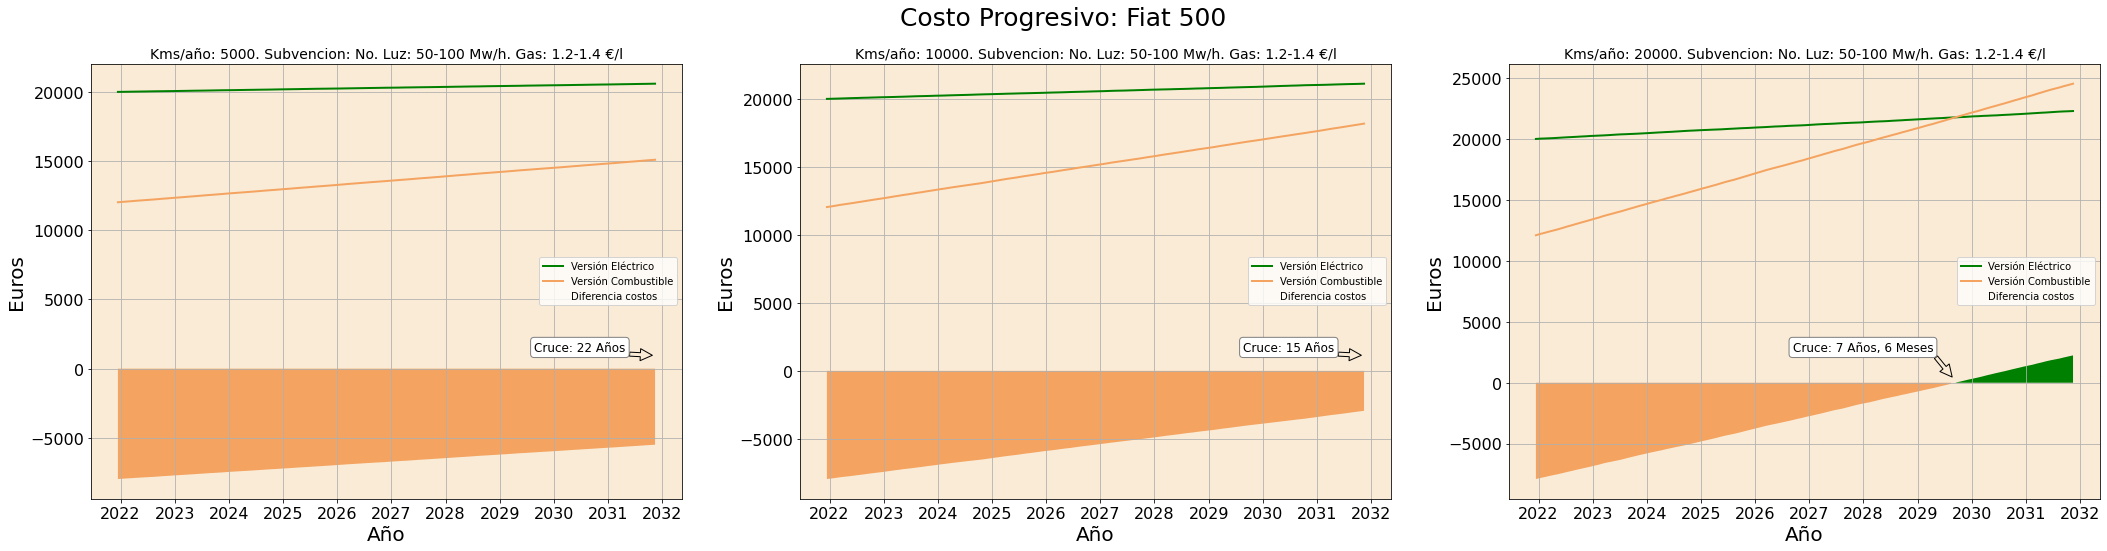

In [165]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(36, 8))
fig.suptitle('Costo Progresivo: Fiat 500' , size=25)

# Gráfica 1

eje_x = get_lista_fechas(120)
kms_estimados_anuales = 5000
eje_y1, eje_y2, eje_y3 = get_costos_acumulados(kms_estimados_anuales)

ax1.plot(eje_x, 
         eje_y3, 
         'g-', 
         lw=2, 
         label = 'Versión Eléctrico')

ax1.plot(eje_x, 
         eje_y1, 
         '-',
         color = 'sandybrown', 
         lw=2, 
         label = 'Versión Combustible')

eje_y = np.array(eje_y1) - np.array(eje_y3)

ax1.plot(eje_x, 
         eje_y, 
         '-', 
         lw=0, 
         label = 'Diferencia costos')

ax1.set_title('Kms/año: 5000. Subvencion: No. Luz: 50-100 Mw/h. Gas: 1.2-1.4 €/l' , size=14)

ax1.set_ylabel('Euros', size = 20)
ax1.set_xlabel('Año', size = 20)



ax1.fill_between(eje_x, 0, eje_y, where=eje_y >= 0, facecolor='green')
ax1.fill_between(eje_x, 0, eje_y, where=eje_y < 0, facecolor='sandybrown')

text = 'Cruce: 22 Años'
ax1.annotate(text, xy=(0.95, 0.33),  xycoords='axes fraction', 
             xytext=(0.75, 0.34), textcoords='axes fraction',
             bbox=dict(boxstyle="round", fc="white", ec="gray"), size = 12,
             arrowprops=dict(fc='#FAEBD7')
            )

# ax.set_ylim(9000, 25000)
ax1.grid(True)

ax1.tick_params(labelsize=16) # Tamaño de los ticks

ax1.set_facecolor('#FAEBD7')

ax1.legend(loc="right")


# Gráfica 2

eje_x = get_lista_fechas(120)
kms_estimados_anuales = 10000
eje_y1, eje_y2, eje_y3 = get_costos_acumulados(kms_estimados_anuales)

ax2.plot(eje_x, 
         eje_y3, 
         'g-', 
         lw=2, 
         label = 'Versión Eléctrico')

ax2.plot(eje_x, 
         eje_y1, 
         '-', 
         color='sandybrown',
         lw=2, 
         label = 'Versión Combustible')

eje_y = np.array(eje_y1) - np.array(eje_y3)

ax2.plot(eje_x, 
         eje_y, 
         '-', 
         lw=0, 
         label = 'Diferencia costos')

ax2.set_title('Kms/año: 10000. Subvencion: No. Luz: 50-100 Mw/h. Gas: 1.2-1.4 €/l' , size=14)

ax2.set_ylabel('Euros', size = 20)
ax2.set_xlabel('Año', size = 20)



ax2.fill_between(eje_x, 0, eje_y, where=eje_y >= 0, facecolor='green')
ax2.fill_between(eje_x, 0, eje_y, where=eje_y < 0, facecolor='sandybrown')

text = 'Cruce: 15 Años'
ax2.annotate(text, xy=(0.95, 0.33),  xycoords='axes fraction', 
             xytext=(0.75, 0.34), textcoords='axes fraction',
             bbox=dict(boxstyle="round", fc="white", ec="gray"), size = 12,
             arrowprops=dict(fc='#FAEBD7')
            )

# ax.set_ylim(9000, 25000)
ax2.grid(True)

ax2.tick_params(labelsize=16) # Tamaño de los ticks

ax2.set_facecolor('#FAEBD7')

ax2.legend(loc="right")

# Gráfica 3

eje_x = get_lista_fechas(120)
kms_estimados_anuales = 20000
eje_y1, eje_y2, eje_y3 = get_costos_acumulados(kms_estimados_anuales)

ax3.plot(eje_x, 
         eje_y3, 
         'g-', 
         lw=2, 
         label = 'Versión Eléctrico')

ax3.plot(eje_x, 
         eje_y1, 
         '-', 
         color='sandybrown',
         lw=2, 
         label = 'Versión Combustible')

eje_y = np.array(eje_y1) - np.array(eje_y3)

ax3.plot(eje_x, 
         eje_y, 
         '-', 
         lw=0, 
         label = 'Diferencia costos')

ax3.set_title('Kms/año: 20000. Subvencion: No. Luz: 50-100 Mw/h. Gas: 1.2-1.4 €/l' , size=14)

ax3.set_ylabel('Euros', size = 20)
ax3.set_xlabel('Año', size = 20)



ax3.fill_between(eje_x, 0, eje_y, where=eje_y >= 0, facecolor='green')
ax3.fill_between(eje_x, 0, eje_y, where=eje_y < 0, facecolor='sandybrown')

# ax.set_ylim(9000, 25000)
ax3.grid(True)

ax3.tick_params(labelsize=16) # Tamaño de los ticks

ax3.set_facecolor('#FAEBD7')

ax3.legend(loc="right")

text = 'Cruce: 7 Años, 6 Meses'
ax3.annotate(text, xy=(0.75, 0.28),  xycoords='axes fraction', 
             xytext=(0.48, 0.34), textcoords='axes fraction',
             bbox=dict(boxstyle="round", fc="white", ec="gray"), size = 12,
             arrowprops=dict(fc='#FAEBD7')
            )

In [144]:
subvencion = 4000
modelo = 'Fiat 500'
# kms_estimados_anuales = 20000
consumo_combustible = 4.8
consumo_electrico = 15.3
precioE = 20000
precioG = 12000

In [145]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(36, 8))
fig.suptitle('Costo Progresivo: Fiat 500' , size=25)

# Gráfica 1

eje_x = get_lista_fechas(120)
kms_estimados_anuales = 5000
eje_y1, eje_y2, eje_y3 = get_costos_acumulados(kms_estimados_anuales)

ax1.plot(eje_x, 
         eje_y3, 
         'g-', 
         lw=2, 
         label = 'Versión Eléctrico')

ax1.plot(eje_x, 
         eje_y1, 
         '-',
         color='sandybrown', 
         lw=2, 
         label = 'Versión Combustible')

eje_y = np.array(eje_y1) - np.array(eje_y3)

ax1.plot(eje_x, 
         eje_y, 
         '-', 
         lw=0, 
         label = 'Diferencia costos')

ax1.set_title('Kms/año: 5000. Subvencion: Si. Luz: 100-200 Mw/h. Gas: 1.2-1.4 €/l' , size=14)

ax1.set_ylabel('Euros', size = 20)
ax1.set_xlabel('Año', size = 20)



ax1.fill_between(eje_x, 0, eje_y, where=eje_y >= 0, facecolor='green')
ax1.fill_between(eje_x, 0, eje_y, where=eje_y < 0, facecolor='sandybrown')

# ax.set_ylim(9000, 25000)
ax1.grid(True)

ax1.tick_params(labelsize=16) # Tamaño de los ticks

ax1.set_facecolor('#FAEBD7')

ax1.legend(loc="right")

text = 'Cruce: 15 Años'
ax1.annotate(text, xy=(0.95, 0.26),  xycoords='axes fraction', 
             xytext=(0.75, 0.3), textcoords='axes fraction',
             bbox=dict(boxstyle="round", fc="white", ec="gray"), size = 12,
             arrowprops=dict(fc='#FAEBD7')
            )


# Gráfica 2

eje_x = get_lista_fechas(120)
kms_estimados_anuales = 10000
eje_y1, eje_y2, eje_y3 = get_costos_acumulados(kms_estimados_anuales)

ax2.plot(eje_x, 
         eje_y3, 
         'g-', 
         lw=2, 
         label = 'Versión Eléctrico')

ax2.plot(eje_x, 
         eje_y1, 
         '-',
         color='sandybrown', 
         lw=2, 
         label = 'Versión Combustible')

eje_y = np.array(eje_y1) - np.array(eje_y3)

ax2.plot(eje_x, 
         eje_y, 
         # '-', 
         lw=0, 
         label = 'Diferencia costos')

ax2.set_title('Kms/año: 10000. Subvencion: Si. Luz: 100-200 Mw/h. Gas: 1.2-1.4 €/l' , size=14)

ax2.set_ylabel('Euros', size = 20)
ax2.set_xlabel('Año', size = 20)



ax2.fill_between(eje_x, 0, eje_y, where=eje_y >= 0, facecolor='green')
ax2.fill_between(eje_x, 0, eje_y, where=eje_y < 0, facecolor='sandybrown')

# ax.set_ylim(9000, 25000)
ax2.grid(True)

ax2.tick_params(labelsize=16) # Tamaño de los ticks

ax2.set_facecolor('#FAEBD7')

ax2.legend(loc="right")

text = 'Cruce: 10 Años'
ax2.annotate(text, xy=(0.95, 0.23),  xycoords='axes fraction', 
             xytext=(0.75, 0.3), textcoords='axes fraction',
             bbox=dict(boxstyle="round", fc="white", ec="gray"), size = 12,
             arrowprops=dict(fc='#FAEBD7')
            )

# Gráfica 3

eje_x = get_lista_fechas(120)
kms_estimados_anuales = 20000
eje_y1, eje_y2, eje_y3 = get_costos_acumulados(kms_estimados_anuales)

ax3.plot(eje_x, 
         eje_y3, 
         'g-', 
         lw=2, 
         label = 'Versión Eléctrico')

ax3.plot(eje_x, 
         eje_y1, 
         '-', 
         color='sandybrown',
         lw=2, 
         label = 'Versión Combustible')

eje_y = np.array(eje_y1) - np.array(eje_y3)

ax3.plot(eje_x, 
         eje_y, 
         '', 
         lw=0, 
         label = 'Diferencia costos')

ax3.set_title('Kms/año: 20000. Subvencion: Si. Luz: 100-200 Mw/h. Gas: 1.2-1.4 €/l' , size=14)

ax3.set_ylabel('Euros', size = 20)
ax3.set_xlabel('Año', size = 20)



ax3.fill_between(eje_x, 0, eje_y, where=eje_y >= 0, facecolor='green')
ax3.fill_between(eje_x, 0, eje_y, where=eje_y < 0, facecolor='sandybrown')

# ax.set_ylim(9000, 25000)
ax3.grid(True)

ax3.tick_params(labelsize=16) # Tamaño de los ticks

ax3.set_facecolor('#FAEBD7')

text = 'Cruce: 5 Años, 1 Mes'
ax3.annotate(text, xy=(0.505, 0.2),  xycoords='axes fraction', 
             xytext=(0.4, 0.3), textcoords='axes fraction',
             bbox=dict(boxstyle="round", fc="white", ec="gray"), size = 12,
           #  arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1),
             arrowprops=dict(facecolor='#FAEBD7')
           # xytext=(10, -40), textcoords='offset points', ha='center',
            )

ax3.legend(loc="right")

In [78]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(36, 8))
fig.suptitle('Rentabilidad: Fiat 500' , size=25)

# Gráfica 1

eje_x = get_lista_fechas(120)
kms_estimados_anuales = 10000
eje_y1, eje_y2, eje_y3 = get_costos_acumulados(kms_estimados_anuales)

# ax1.plot(eje_x, 
#          eje_y3, 
#          'g-', 
#          lw=2, 
#          label = 'Versión Eléctrico')

# ax1.plot(eje_x, 
#          eje_y1, 
#          '-',
#          color='sandybrown', 
#          lw=2, 
#          label = 'Versión Combustible')

eje_y = np.array(eje_y1) - np.array(eje_y3)

ax1.plot(eje_x, 
         eje_y, 
         '-', 
         lw=0, 
         label = 'Diferencia costos')

ax1.set_title('Kms/año: 5000. Subvencion: Si. Luz: 100-200 Mw/h. Gas: 1.2-1.4 €/l' , size=14)

ax1.set_ylabel('Euros', size = 20)
ax1.set_xlabel('Año', size = 20)



ax1.fill_between(eje_x, 0, eje_y, where=eje_y >= 0, facecolor='green')
ax1.fill_between(eje_x, 0, eje_y, where=eje_y < 0, facecolor='sandybrown')

ax1.set_ylim(-4000, 2000)
ax1.grid(True)

ax1.tick_params(labelsize=16) # Tamaño de los ticks

ax1.set_facecolor('#FAEBD7')

# ax1.legend(loc="right")

# ax1.annotate("Costo versión Gasolina: 12000", xy=(0.08, 0.9),  xycoords='axes fraction',
#             bbox=dict(boxstyle="round", fc="none", ec="gray"), size = 12,
#            # xytext=(10, -40), textcoords='offset points', ha='center',
#             )
# ax1.annotate("Costo versión Eléctrico: 20000", xy=(0.08, 0.85),  xycoords='axes fraction',
#             bbox=dict(boxstyle="round", fc="none", ec="gray"), size = 12,
#            # xytext=(10, -40), textcoords='offset points', ha='center',
#             )


# Gráfica 2

eje_x = get_lista_fechas(120)
kms_estimados_anuales = 18000
eje_y1, eje_y2, eje_y3 = get_costos_acumulados(kms_estimados_anuales)

# ax2.plot(eje_x, 
#          eje_y3, 
#          'g-', 
#          lw=2, 
#          label = 'Versión Eléctrico')

# ax2.plot(eje_x, 
#          eje_y1, 
#          '-',
#          color='sandybrown', 
#          lw=2, 
#          label = 'Versión Combustible')

eje_y = np.array(eje_y1) - np.array(eje_y3)

ax2.plot(eje_x, 
         eje_y, 
         # '-', 
         lw=0, 
         label = 'Diferencia costos')

ax2.set_title('Kms/año: 10000. Subvencion: Si. Luz: 100-200 Mw/h. Gas: 1.2-1.4 €/l' , size=14)

ax2.set_ylabel('Euros', size = 20)
ax2.set_xlabel('Año', size = 20)



ax2.fill_between(eje_x, 0, eje_y, where=eje_y >= 0, facecolor='green')
ax2.fill_between(eje_x, 0, eje_y, where=eje_y < 0, facecolor='sandybrown')

# ax.set_ylim(9000, 25000)
ax2.grid(True)

ax2.tick_params(labelsize=16) # Tamaño de los ticks

ax2.set_facecolor('#FAEBD7')

# ax2.legend(loc="right")

# ax2.annotate("Costo versión Gasolina: 12000", xy=(0.08, 0.9),  xycoords='axes fraction',
#             bbox=dict(boxstyle="round", fc="none", ec="gray"), size = 12,
#            # xytext=(10, -40), textcoords='offset points', ha='center',
#             )
# ax2.annotate("Costo versión Eléctrico: 20000", xy=(0.08, 0.85),  xycoords='axes fraction',
#             bbox=dict(boxstyle="round", fc="none", ec="gray"), size = 12,
#            # xytext=(10, -40), textcoords='offset points', ha='center',
#             )

# Gráfica 3

eje_x = get_lista_fechas(120)
kms_estimados_anuales = 28000
eje_y1, eje_y2, eje_y3 = get_costos_acumulados(kms_estimados_anuales)

# ax3.plot(eje_x, 
#          eje_y3, 
#          'g-', 
#          lw=2, 
#          label = 'Versión Eléctrico')

# ax3.plot(eje_x, 
#          eje_y1, 
#          '-', 
#          color='sandybrown',
#          lw=2, 
#          label = 'Versión Combustible')

eje_y = np.array(eje_y1) - np.array(eje_y3)

ax3.plot(eje_x, 
         eje_y, 
         '', 
         lw=0, 
         label = 'Diferencia costos')

ax3.set_title('Kms/año: 20000. Subvencion: Si. Luz: 100-200 Mw/h. Gas: 1.2-1.4 €/l' , size=14)

ax3.set_ylabel('Euros', size = 20)
ax3.set_xlabel('Año', size = 20)



ax3.fill_between(eje_x, 0, eje_y, where=eje_y >= 0, facecolor='green')
ax3.fill_between(eje_x, 0, eje_y, where=eje_y < 0, facecolor='sandybrown')

# ax.set_ylim(9000, 25000)
ax3.grid(True)

ax3.tick_params(labelsize=16) # Tamaño de los ticks

ax3.set_facecolor('#FAEBD7')

text = "Costo versión Gasolina: 12000" + '\n' + '\n' + "Costo versión Eléctrico: 20000"

# ax3.annotate(text, xy=(0.08, 0.9),  xycoords='axes fraction',
#             bbox=dict(boxstyle="round", fc="none", ec="gray"), size = 12,
#            # xytext=(10, -40), textcoords='offset points', ha='center',
#             )

ax3.text(0.2, 0.8, text, horizontalalignment='center', size = 12,
     verticalalignment='center', transform=ax.transAxes, bbox=dict(boxstyle="round", fc="white", ec="gray", facecolor='white', alpha=0.9))

ax3.text(0.985, 0.8, text, horizontalalignment='center', size = 12,
verticalalignment='center', transform=ax.transAxes, bbox=dict(boxstyle="round", fc="white", ec="gray", facecolor='white', alpha=0.9))

ax3.text(1.77, 0.8, text, horizontalalignment='center', size = 12,
verticalalignment='center', transform=ax.transAxes, bbox=dict(boxstyle="round", fc="white", ec="gray", facecolor='white', alpha=0.9))

# ax3.legend(loc="right")


Text(1.77, 0.8, 'Costo versión Gasolina: 12000\n\nCosto versión Eléctrico: 20000')

In [10]:
import plotly.graph_objects as go
import numpy as np
x = eje_x
y = eje_y
mask = y >= 0
fig = go.Figure(go.Scatter(x = x[mask], y = y[mask], mode = 'lines',
   fill = 'tozeroy', fillcolor = 'green'))
fig.add_trace(go.Scatter(x = x[~mask], y = y[~mask], mode = 'lines', fill = 'tozeroy', fillcolor = 'red'))

fig.show()

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
type(eje_x)

list